# Import Necessary Libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [6]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 2.9 MB/s eta 0:00:04
    --------------------------------------- 0.3/10.6 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.6 MB 2.7 MB/s eta 0:00:04
   - -------------------------------------- 0.5/10.6 MB 2.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.6 MB 2.2 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/10.6 MB 2.7 MB/s eta 0:00:04
   ---- ----------------

In [13]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 770.8 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import sklearn

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# EDA

In [6]:
dataset = pd.read_csv('C:/Users/DELL/Downloads/machine_learning_dataset/spam.csv')
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
dataset.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
dataset.value_counts()

Category  Message                                                                                                                                                
ham       Sorry, I'll call later                                                                                                                                     30
          I cant pick the phone right now. Pls send a message                                                                                                        12
          Ok...                                                                                                                                                      10
          Okie                                                                                                                                                        4
          7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st "Ur Lovely Friendship"... good morning dear     

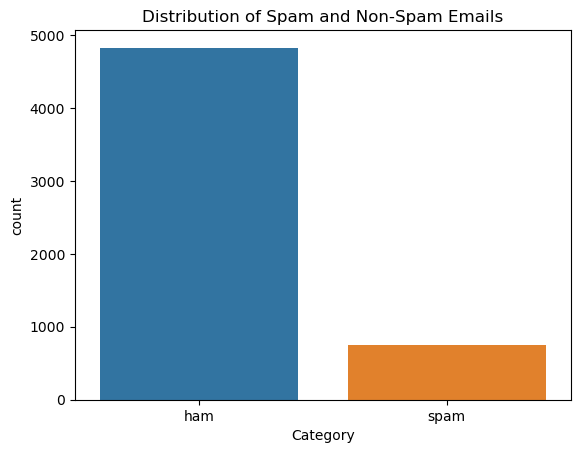

In [10]:
sn.countplot(x='Category', data=dataset)

plt.title('Distribution of Spam and Non-Spam Emails')

plt.show()

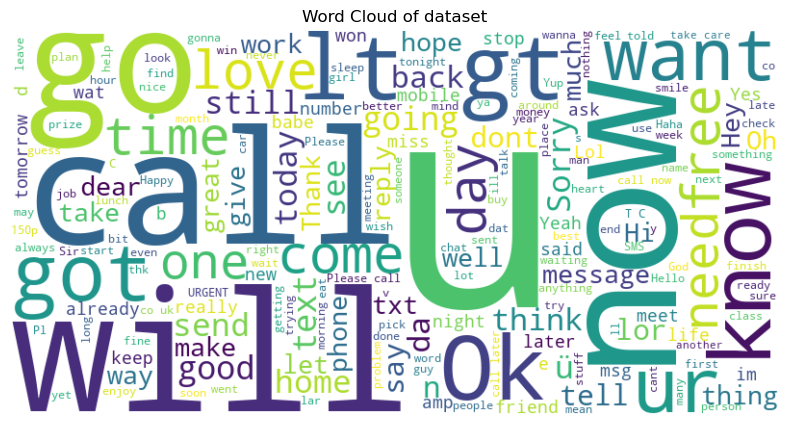

In [14]:
from wordcloud import WordCloud
words = WordCloud(width=800, height=400, background_color='white').generate(' '.join(dataset['Message']))

plt.figure(figsize=(10, 5))
plt.imshow(words, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of dataset')
plt.show()


In [15]:
from wordcloud import WordCloud
spam = dataset[dataset['Category'] == 'spam']
spam


,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [16]:
dataset[dataset['Category'] == 'spam'].value_counts()

Category  Message                                                                                                                                                           
spam      Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!                   4
          #ERROR!                                                                                                                                                               3
          Loan for any purpose £500 - £75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'    3
          Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Delivery within 28 days.                                                            3
          December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for

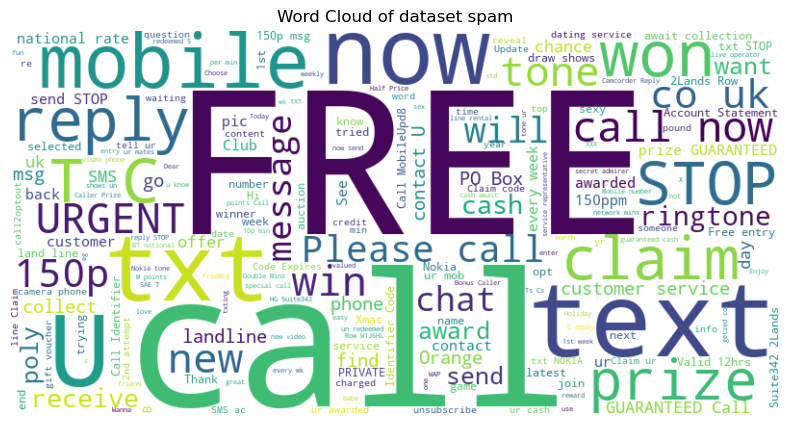

In [17]:
spamdata = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam['Message']))

plt.figure(figsize=(10, 5))
plt.imshow(spamdata, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of dataset spam')
plt.show()

In [18]:
dataset[dataset['Category'] == 'ham'].value_counts()

Category  Message                                                                                                                                 
ham       Sorry, I'll call later                                                                                                                      30
          I cant pick the phone right now. Pls send a message                                                                                         12
          Ok...                                                                                                                                       10
          Okie                                                                                                                                         4
          Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..     4
                                                                                        

**after analysing the data, we will need to :**
1. replace the 'category' column with numeric values
2. use countVectorizer to represent each data as a vector of numbers

# Data Preprocessing

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dataset['Category_1'] = label_encoder.fit_transform(dataset['Category'])

# # Display the mapping of original categories to numerical labels
# print("Mapping of Categories to Numerical Labels:")
# for original, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
#     print(f"{original}: {encoded}")


In [20]:
dataset

,Category,Message,Category_1
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [146]:
#droping the category column mistake to create new coln that col will delete
dataset.drop('Category_1',inplace =True, axis =1)

In [21]:
dataset['spam'] = dataset['Category'].apply(lambda x: 1 if x=='spam' else 0)
dataset.head()

,Category,Message,Category_1,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [22]:
dataset['spam']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: int64

## Train Test Split

In [23]:
x= dataset["Message"]
y= dataset["spam"]


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [25]:
# plt.plot(x_train)
# dataset['Category_msg'] = label_encoder.fit_transform(dataset['Message'])

# Building The Model

In [26]:
clf = Pipeline([('vectorizer', CountVectorizer()),('nb', MultinomialNB())])

In [27]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

## The Model Accuracy

In [28]:
clf.score(x_train,y_train)

0.9922225545916841

In [29]:
clf.score(x_test,y_test)

0.9865410497981157

In [30]:
testing_emails = ["don't miss this chance to win 100$ dollars"]

In [31]:
da=clf.predict(testing_emails)
da

array([1], dtype=int64)

In [32]:
replacement_value = 'spam_mail'

modified_predictions = [replacement_value if pred == 1 else pred for pred in da]
modified_predictions

['spam_mail']

In [33]:
import joblib

# Assuming clf is your trained classifier and vectorizer is your text vectorizer
joblib.dump(clf,'spam-emails-detection-using-naive-bayes-99.joblib')
# joblib.dump(vectorizer, 'spam-emails-detection-using-naive-bayes-99.joblib')


['spam-emails-detection-using-naive-bayes-99.joblib']